In [1]:
# import your standard packages
%run pkgs.py
%run pars.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Get Data

In [2]:
dsr = xr.open_dataset('../data/2d_var_regional_processed.nc')
dsr

<xarray.Dataset>
Dimensions:                            (lat: 256, lat_u: 256, lat_v: 257, lon: 428, lon_u: 429, lon_v: 428, scalar_axis: 1, time: 108)
Coordinates:
  * time                               (time) datetime64[ns] 2009-01-16T12:00:00 ... 2017-12-16T12:00:00
  * lat                                (lat) float32 -30.455408 ... 30.239664
  * lon                                (lon) float32 29.375 29.625 ... 136.125
  * lat_u                              (lat_u) float32 -30.455408 ... 30.239664
  * lon_u                              (lon_u) float32 29.25 29.5 ... 136.25
  * lat_v                              (lat_v) float32 -30.563103 ... 30.347595
  * lon_v                              (lon_v) float32 29.375 29.625 ... 136.125
  * scalar_axis                        (scalar_axis) int64 0
Data variables:
    SSH                                (time, lat, lon) float32 ...
    SST                                (time, lat, lon) float32 ...
    SSS                                (ti

In [3]:
dsg = xr.open_dataset('../data/2d_var_global_processed.nc')
dsg

<xarray.Dataset>
Dimensions:           (lat: 256, lat_u: 256, lat_v: 257, lon: 428, lon_u: 429, lon_v: 428, time: 108)
Coordinates:
  * time              (time) datetime64[ns] 2009-01-16T12:00:00 ... 2017-12-16T12:00:00
  * lat               (lat) float32 -30.455408 -30.239664 ... 30.239664
  * lon               (lon) float32 29.375 29.625 29.875 ... 135.875 136.125
  * lat_u             (lat_u) float32 -30.239664 -30.023445 ... 30.455408
  * lon_u             (lon_u) float32 29.25 29.5 29.75 ... 135.5 135.75 136.0
  * lat_v             (lat_v) float32 -30.563103 -30.347595 ... 30.347595
  * lon_v             (lon_v) float32 29.375 29.625 29.875 ... 135.875 136.125
Data variables:
    SSH               (time, lat, lon) float32 ...
    SST               (time, lat, lon) float32 ...
    SSS               (time, lat, lon) float32 ...
    SSU               (time, lat_u, lon_u) float32 ...
    SSV               (time, lat_v, lon_v) float32 ...
    taux              (time, lat_u, lon_u) floa

In [10]:
dsr.lon

<xarray.DataArray 'lon' (lon: 428)>
array([ 29.375,  29.625,  29.875, ..., 135.625, 135.875, 136.125],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 29.375 29.625 29.875 ... 135.625 135.875 136.125

In [4]:
# quick check to make sure grids are the same

np.sum(dsr.lat-dsg.lat),np.sum(dsr.lon-dsg.lon),

(<xarray.DataArray 'lat' ()>
 array(0., dtype=float32), <xarray.DataArray 'lon' ()>
 array(0., dtype=float32))

In [5]:
np.sum(dsr.lat_v-dsg.lat_v),np.sum(dsr.lon_v-dsg.lon_v)

(<xarray.DataArray 'lat_v' ()>
 array(0., dtype=float32), <xarray.DataArray 'lon_v' ()>
 array(0., dtype=float32))

In [6]:
np.sum(dsr.lat_u-dsg.lat_u),np.sum(np.array(dsr.lon_u)-np.array(dsg.lon_u))

(<xarray.DataArray 'lat_u' ()>
 array(0., dtype=float32), 76.25)

# Difference

In [7]:
keys = list(dsr.keys())
keys.remove('net_fresh_water_global_adjustment')
keys.remove('evap')
keys.remove('precip')

diff = {}

for kk,key in enumerate(keys):
    varr = dsr[key]
    varg = dsg[key]
    
    for tt in range(varr.shape[0]):
        diff_temp = (np.array(varg[tt,:,:])-np.array(varr[tt,:,:]))/np.array(varg[tt,:,:])*100
        diff_temp = diff_temp.flatten()
        diff_temp = diff_temp[~np.isnan(diff_temp)]

        if tt == 0:
            diff[key] = diff_temp
        else:
            diff[key] = np.concatenate((diff[key],diff_temp), 0)

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Text(0, 0.5, 'Relative Error\n(global-regional)/global*100')

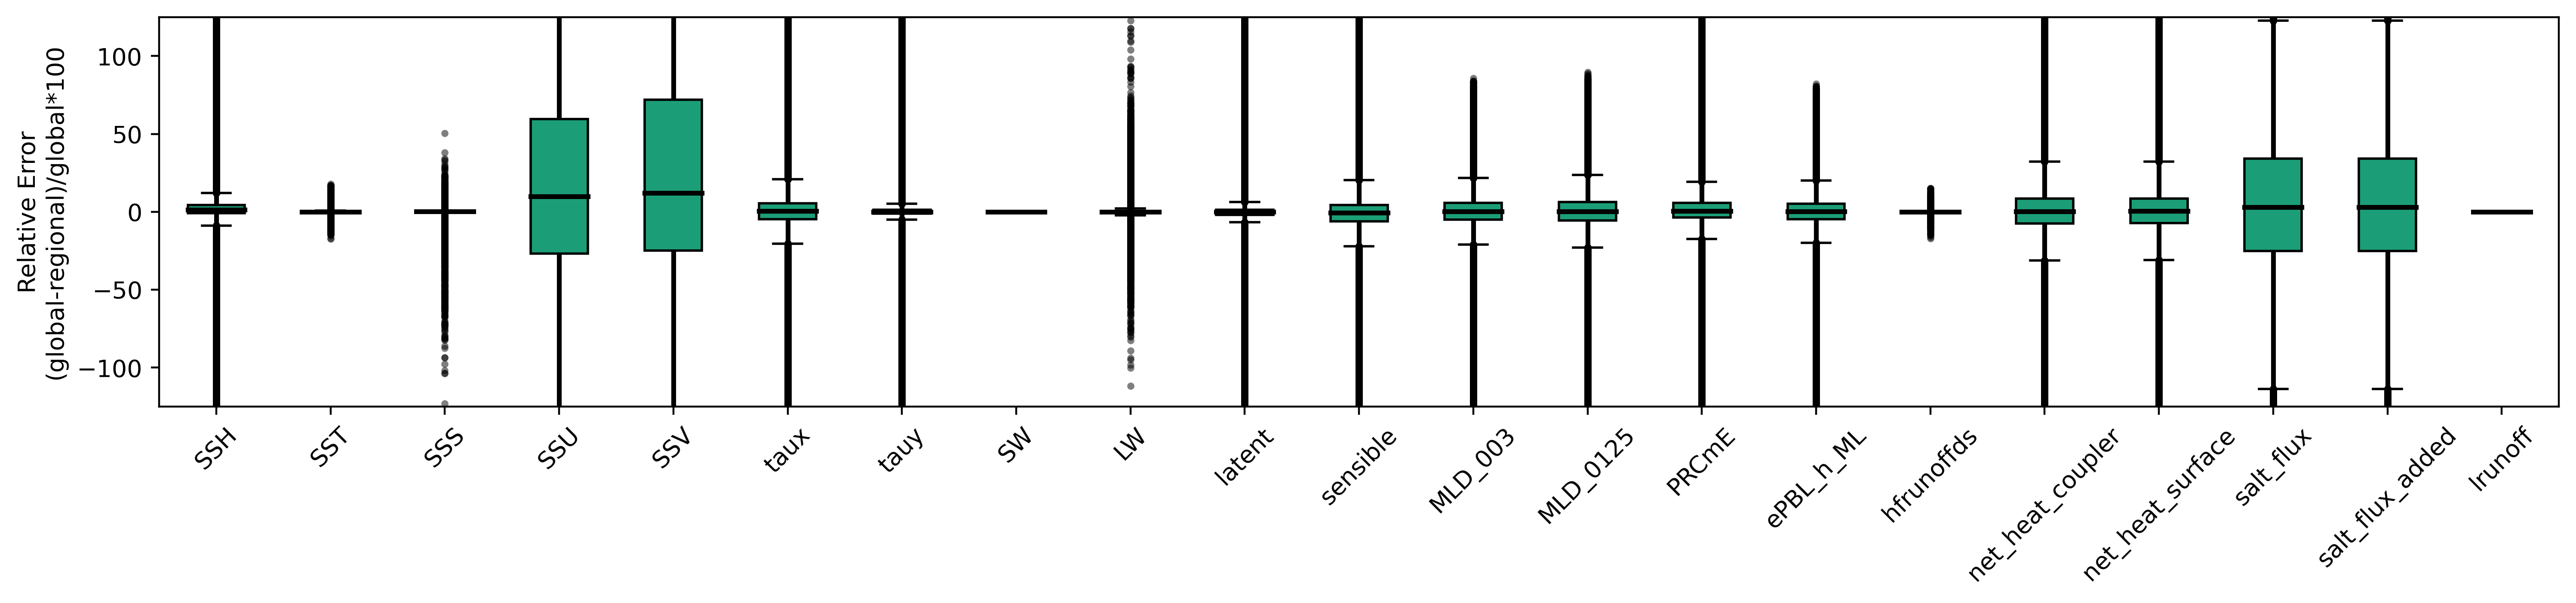

In [12]:
fig, ax = plt.subplots(figsize=(18,3), dpi = 400)

flierprops = dict(marker='.', markerfacecolor='k', alpha = 0.5,
                  linestyle='none', markeredgecolor='none')
boxprops = dict(facecolor = '#1b9e77')
whiskerprops = dict(color='k', linewidth=2)
medianprops = dict(color='k', linewidth=2)

bp =ax.boxplot(diff.values(), patch_artist=True, flierprops = flierprops, 
               boxprops = boxprops, whiskerprops = whiskerprops, medianprops = medianprops)
ax.set_xticklabels(diff.keys())
ax.set_ylim([-125,125])
plt.xticks(rotation=45)
  
ax.set_ylabel('Relative Error\n(global-regional)/global*100')

# Resources

https://mom6.readthedocs.io/en/latest/api/generated/modules/mom_forcing_type.html